# Práctica 6 Diseño de filtro rechaza banda Chebyshev tipo 1 y 2 

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.signal      as sg
import sounddevice       as sd

In [2]:
""""Función para estimación de FFT en dB"""

def fou(senal,sr):
    """senal: señal a la que desea obtener la transformada de Fourier
    sr: Frecuencia de muestreo de la señal"""
    f = np.fft.fft(senal)
    h = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w = np.linspace(0,sr/2,int(f.shape[0]/2))
    
    return h, w

In [3]:
"""Función para obtener la caracterización de filtros digitales"""

def freqz_plot(b,a,sr):
    """ba: coeficientes del diseño del filtro
    sr: Frecuencia de muestreo"""
    w,h     = sg.freqz(b,a)
    h[h==0] = 1E-5
    H       = 20*np.log10(np.abs(h))
    W       = np.angle(h)
    W       = np.unwrap(W)
    W       = np.degrees(W)
    w       = np.linspace(0,sr/2,H.shape[0])
    
    return w,W,H

In [4]:
datapath = 'C:\\Users\\HP desktop\\Documents\\Trimestre 19I\\Servicio social\\' #Ruta donde se encuentra la señal PCG_60.npz

In [5]:
#Cargar archivo npz de señal de fonocardiograma contaminado

PCG = np.load(datapath+'data\\PCG_60.npz')

for i in PCG.keys(): #Observar las variables que se encuentran en el archivo npz
    print (i)

PCG
sr


In [6]:
# Asignación de variables que se encuentran en los archivos npz

sr  = PCG['sr']
PCG = PCG['PCG']

In [ ]:
#Reproducción de audio de fonocardiograma contaminado 
sd.play(PCG,sr)

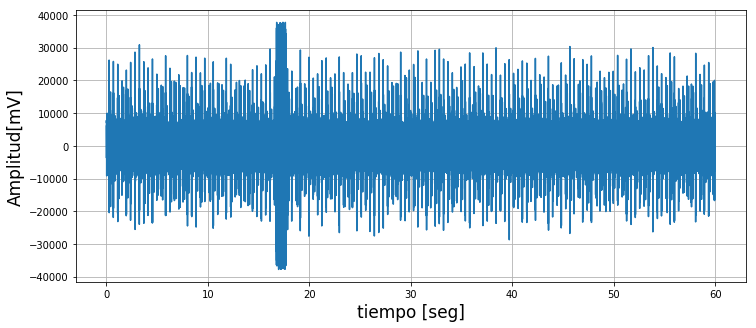

In [7]:
# Grafica de la señal 

t = np.linspace(0,PCG.shape[0]/sr,PCG.shape[0]) # Eje de tiempo

plt.figure(figsize=(12,5))
plt.plot(t,PCG) 
# plt.title('Señal original de PCG',fontsize=17)
plt.xlabel('tiempo [seg]',fontsize=17)
plt.ylabel('Amplitud[mV]',fontsize=17)
plt.grid(True)

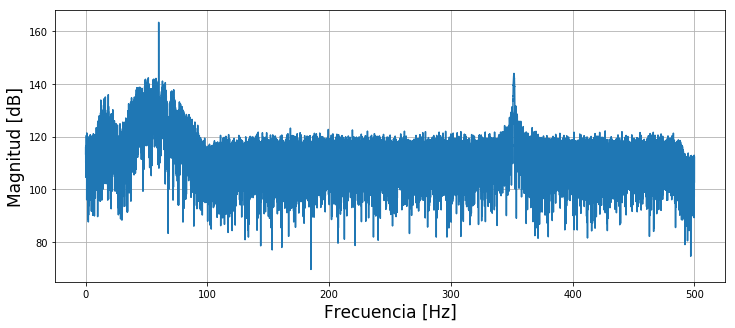

In [8]:
# FFT de la señal contaminada 

h,w = fou(PCG,sr)
plt.figure(figsize=(12,5))
plt.plot(w,h)
# plt.title('FFT de la señal contaminada',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)

In [9]:
#Diseño de filtro Chebyshev tipo 1 orden 4 

n     = 4
fc1   = 2*np.array( [58,62] )/sr 
b1,a1 = sg.cheby1(n,2,fc1,btype='bandstop')

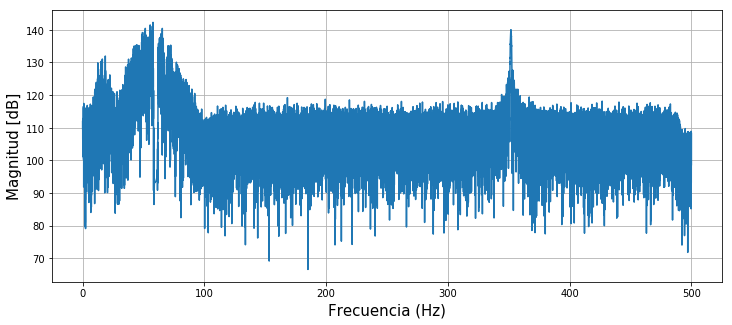

In [14]:
#Filtrado de la señal en fase cero 
PCG1 = sg.lfilter(b1,a1,PCG)
PCG1 = sg.lfilter(b1,a1,PCG1[::-1])[::-1]

#FFT de la señal filtrada 
h1,w1 = fou(PCG1,sr)
plt.figure(figsize=(12,5))
plt.plot(w1,h1)
plt.xlabel('Frecuencia (Hz)',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(datapath+'\\images\\FFT_Cheby1PCG')

In [12]:
#Reproducir señal filtrada 
sd.play(PCG1,sr)

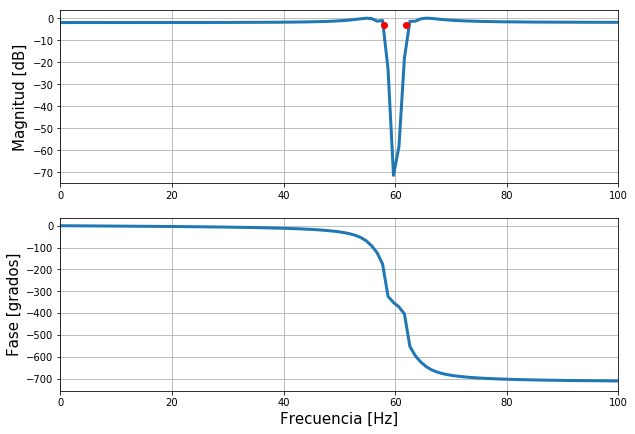

In [27]:
#Caracterización de filtros
w1,W1,H1 = freqz_plot(b1,a1,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w1,H1,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w1,W1,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
plt.savefig(datapath+'images\\RF_Cheby1PCG')

In [13]:
print(b1,a1)

[  0.76929933  -5.72266325  19.04085093 -36.95972544  45.74477495
 -36.95972544  19.04085093  -5.72266325   0.76929933] [  1.          -7.37843847  24.35252913 -46.89318236  57.58093193
 -46.15894498  23.59595255  -7.03732173   0.93884918]


In [46]:
#Diseño de filtro Chebyshev tipo 2 orden 4

fc2   = 2*np.array( [58.5,61.5] )/sr
b2,a2 = sg.cheby2(n,20,fc2,btype='bandstop')

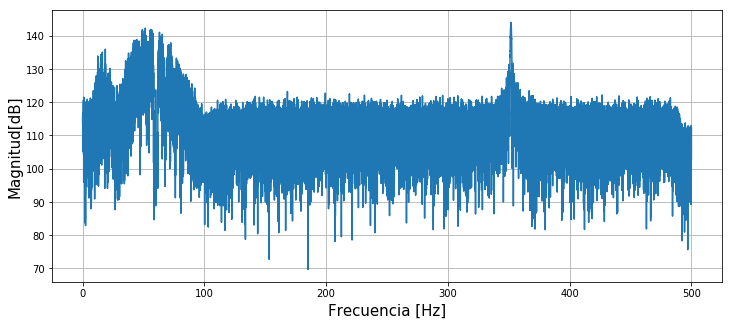

In [51]:
# Filtrado de la señal 

PCG2 = sg.lfilter(b2,a2,PCG)
PCG2 = sg.lfilter(b2,a2,PCG2[::-1])[::-1]

# FFT de la señal filtrada 
H2,w2 = fou(PCG2,sr)

plt.figure(figsize=(12,5))
plt.plot(w2,H2)
plt.xlabel('Frecuencia [Hz]', fontsize=15)
plt.ylabel('Magnitud[dB]',fontsize=15)
plt.grid(True)
plt.savefig(datapath+'\\images\\FFT_Cheby2PCG')

In [48]:
sd.play(PCG2,sr)

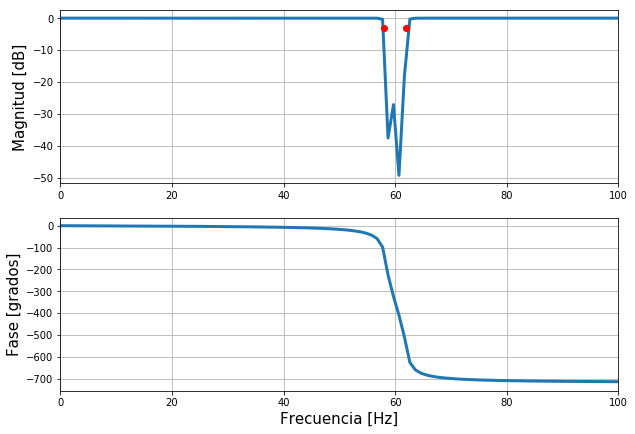

In [52]:
# Caracterización del filtro 

w2,W2,H2 = freqz_plot(b2,a2,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w2,H2,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58.,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62.,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w2,W2,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
plt.savefig(datapath+'\\images\\RF_Cheby2PCG')
